In [60]:
import matplotlib.pyplot as plt 
from scipy import stats


plt.rcParams['text.usetex'] = True #Let TeX do the typsetting
plt.rcParams['text.latex.preamble'] = [r'\usepackage{sansmath}', r'\sansmath'] #Force sans-serif math mode (for axes labels)
plt.rcParams['font.family'] = 'sans-serif' # ... for regular text
plt.rcParams['font.sans-serif'] = 'Helvetica, Avant Garde, Computer Modern Sans serif' # Choose a nice font here

import seaborn as sns
import pandas as pd 
import numpy as np

sns.set_style("whitegrid")
markers = ['+', '.', 'x', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', '|', '_', 'P', 'X', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11 ]
def get_scatter_plot(xx,yy, labels, fc = 20, name=None): 
    fig, ax = plt.subplots()
    plots = []
    for i, (x,y) in enumerate(zip(xx,yy)):
        plots.append(plt.scatter(x=x, y=y, marker=markers[i]))
    
    
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    ax.plot(lims, lims, 'k--', alpha=1.0, zorder=0)

#     for i, (x,y) in enumerate(zip(xx,yy)):
#         target_line = stats.siegelslopes(y, x)
#         print(target_line)
#         target_fn = np.poly1d(target_line)
#         lin = np.linspace(lims[0],lims[1],1000)
#         plt.plot(lin, target_fn(lin), "-",alpha=0.7, linewidth=3.0)

    
    # now plot both limits against eachother
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    plt.title(name, fontsize=fc)
    plt.legend(plots, labels, fontsize=fc-5)
    plt.xticks(fontsize=fc)
    plt.yticks(fontsize=fc)
    plt.xlabel("OOD Accuracy", fontsize=fc)
    plt.ylabel("Predicted Accuracy", fontsize=fc)
    plt.savefig("figures/" + name + "_app.pdf", transparent=True, bbox_inches='tight')
    plt.show()
    


<ipython-input-60-d77f9a1f8058>:6: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  plt.rcParams['text.latex.preamble'] = [r'\usepackage{sansmath}', r'\sansmath'] #Force sans-serif math mode (for axes labels)


(3, 5)


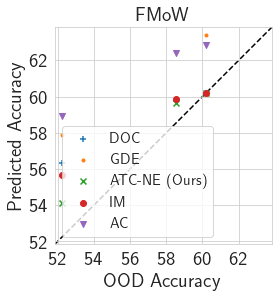

In [61]:
filename = "outputs/FMoW/DenseNet121_0.0001_0.0_0.0_Adam_50_1111/predicted_acc_T_2/45.csv"
xx = []
yy = []

with open(filename, "r") as f: 
    for i,line in enumerate(f):
#         if i > 102 or i <1: continue
        # if i <= 102 and i >=1: continue
#         if (i >= 50 and i <= 62) or (i>=148 and i <=158): continue
        x = []
        y = []

        vals = line.rstrip().split(",")
        vals = [float(v) for v in vals]
       
#         x.append(vals[1])
#         x.append(vals[1])
#         x.append(vals[1])
#         x.append(vals[1])
#         x.append(vals[1])
#         y.append(vals[17])
#         y.append(vals[20])
#         y.append(vals[12])
#         y.append(vals[19])
#         y.append(vals[15])
        
        x.append(vals[1])
        x.append(vals[1])
        x.append(vals[1])
        x.append(vals[1])
        x.append(vals[1])
        y.append(vals[19])
        y.append(vals[22])
        y.append(vals[12])
        y.append(vals[21])
        y.append(vals[17])
# #         if (np.abs(vals[10] - vals[0]) > 20): print(i)
        xx.append(x)
        yy.append(y)

xx = np.array(xx)
yy = np.array(yy)

print(xx.shape)
get_scatter_plot(xx.T, yy.T, labels=["DOC", "GDE", "ATC-NE (Ours)", "IM", "AC"], name="FMoW")

(100, 3)
(0.43363999780760676, 46.52133607535812)
(0.5104381030679112, 43.50832212067204)
(0.9371959592735246, 9.760554205936863)


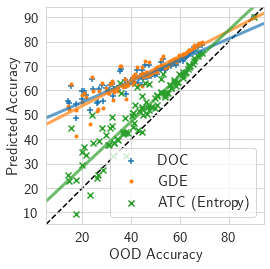